In [1]:
#matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [15]:
class Bandit(object):
    def __init__(self, true_mean, mean=0., trials=0.):
        self.true_mean = true_mean
        self.mean = mean
        self.trials = 0.
        
    def pull_arm(self):
        value = self.true_mean + np.random.randn()
        self.mean = (value + self.trials * self.mean) / (self.trials + 1)
        self.trials += 1
        return value

    
class EpsilonAgent(object):
    def __init__(self, bandit_means):
        self.bandits = [Bandit(mean) for mean in bandit_means]
        self.trial = 0
        
    def act(self):
        r = np.random.random()
        self.trial += 1
        if r > 1/self.trial:
            bandit_index = np.argmax([bandit.mean for bandit in self.bandits])
        else:
            bandit_index = np.random.randint(0, len(self.bandits))
        value = self.bandits[bandit_index].pull_arm()
        return value
    
    
class GreedyAgent(object):
    def __init__(self, bandit_means):
        self.bandits = [Bandit(mean, mean=2*max(bandit_means), trials=3.)
                        for mean in bandit_means]
        
    def act(self):
        bandit_index = np.argmax([bandit.mean for bandit in self.bandits])
        value = self.bandits[bandit_index].pull_arm()
        return value

    
def run_experiment(agent_class, means, N, M):
    cumulations = np.zeros(N)
    for i in range(M):
        agent = agent_class(means)
        data = np.empty(N)
        for i in range(N):
            data[i] = agent.act()
        cumulations += np.cumsum(data) / (np.arange(N) + 1)
    return cumulations / (np.ones(N)*M)


def plot(cumulative_averages, means):
    for mean in means:
        plt.plot(np.ones(N)*mean)
    for name, cumulative_average in cumulative_averages.items():
        plt.plot(cumulative_average, label=name)
    plt.legend()
    plt.xscale('log')

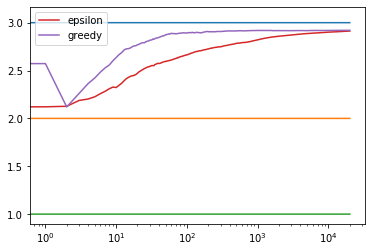

In [20]:
means = [3, 2, 1]
N = 20000
M = 100
cumulative_averages = {
    'epsilon': run_experiment(EpsilonAgent, means, N, M),
    'greedy': run_experiment(GreedyAgent, means, N, M)
}
plot(cumulative_averages, means)

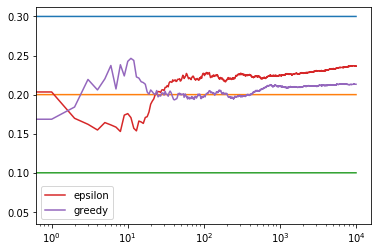

In [29]:
means = [.3, .2, .1]
N = 10000
M = 100
cumulative_averages = {
    'epsilon': run_experiment(EpsilonAgent, means, N, M),
    'greedy': run_experiment(GreedyAgent, means, N, M)
}
plot(cumulative_averages, means)